In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
import pandas as pd

df = pd.read_csv("adult_data.csv", na_filter=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
# Data preprocess.
df.rename(columns = {' workclass': 'workclass', ' fnlwgt': 'fnlwgt', " education":"education", " education-num":"education_num",
                          " marital-status":"marital_status", " occupation":"occupation", " relationship":"relationship", " race":"race",
                           " sex":"sex", " capital-gain":"capital_gain", " capital-loss":"capital_loss", " hours-per-week":"hours_per_week",
                          " native-country":"native_country", " salary":"salary"}, inplace = True)

df.drop(["fnlwgt", "education", "native_country"], inplace=True, axis=1)

df = df[df.workclass != " ?"]
df = df[df.occupation != " ?"]

df = pd.get_dummies(df, columns = ['workclass', 'marital_status', 'occupation','relationship','race','sex'])

df['salary'].replace(" <=50K","0", inplace = True)
df['salary'].replace(" >50K","1", inplace = True)

df['salary'] = df['salary'].astype("int64")

y = df['salary']
X = df.drop(['salary'], axis=1)

X_mat = X.to_numpy()

In [12]:
# Split to train, test data.
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, accuracy_score

# Build our decision tree.
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
print("Train accuracy:", model.score(X_train, y_train))  # Training accuracy is very high, almost 100%
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 0.9772579294949307
Test accuracy: 0.8122829861111112


In [15]:
y_pred = model.predict(X_test)  # Take a look at F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6921
           1       0.62      0.62      0.62      2295

    accuracy                           0.81      9216
   macro avg       0.75      0.75      0.75      9216
weighted avg       0.81      0.81      0.81      9216



In [16]:
from sklearn import tree  # How many nodes we have in this tree

treeObj = model.tree_
print(treeObj.node_count)

7787


In [17]:
import numpy as np

# Take a look at our feature importances
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

for i in indices:
    print(feature_names[i], ':', importances[i])

marital_status_ Married-civ-spouse : 0.21811912748444312
age : 0.17792453945853562
education_num : 0.1445160833113839
capital_gain : 0.11275260653484563
hours_per_week : 0.09416953452049097
capital_loss : 0.03888993350513389
workclass_ Private : 0.014306665002847331
occupation_ Exec-managerial : 0.012380635734016609
occupation_ Craft-repair : 0.011061654728142861
workclass_ Local-gov : 0.010960633113727377
occupation_ Sales : 0.010866173322944641
workclass_ Self-emp-not-inc : 0.010751401178443807
occupation_ Prof-specialty : 0.009411573104902286
race_ White : 0.009101316562525007
workclass_ Self-emp-inc : 0.008697560070198175
occupation_ Adm-clerical : 0.008653321412246765
workclass_ Federal-gov : 0.007883028986121298
race_ Black : 0.0074992576494978
occupation_ Other-service : 0.0068703156474137425
occupation_ Machine-op-inspct : 0.006664573458930335
workclass_ State-gov : 0.006368400715342258
sex_ Male : 0.005803313752156961
occupation_ Transport-moving : 0.00574693598797846
occupati

In [18]:
from sklearn.model_selection import GridSearchCV

# Use GridSearchCV to find optimal hyperparameters for our final decision tree
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=42),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([0.01791101, 0.01627114, 0.01795409, 0.0162549 , 0.02484808,
       0.02472937, 0.02413599, 0.02306623, 0.03161805, 0.03223805,
       0.03116517, 0.03261209, 0.04304013, 0.03881166, 0.04036629,
       0.04205098, 0.04652631, 0.04554875, 0.04677384, 0.04605303,
       0.05267689, 0.05337739, 0.05304115, 0.05271511, 0.05767536,
       0.05972192, 0.06091216, 0.05926027, 0.06793165, 0.06844914,
       0.06717196, 0.06926799, 0.07281346, 0.07384455, 0.07344034,
       0.07244015, 0.07906671, 0.07878692, 0.07783866, 0.07692411,
       0.08341184, 0.08717387, 0.08359137, 0.08462865, 0.08876462,
       0.08824558, 0.08688729, 0.08565381, 0.09437456, 0.09328411,
       0.08969464, 0.08753297, 0.09667134, 0.09460013, 0.09321344,
       0.09101105, 0.09978271, 0.09529505, 0.09347568, 0.09315412,
       0.01487899, 0.01524525, 0.01580377, 0.01606116, 0.0234005 ,
       0.02578614, 0.02366447, 0.02317727, 0.03226571, 0.03336844,
       0.03094075, 0.0329282 , 0.03837202, 0

In [19]:
import matplotlib.pyplot as plt  

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  120


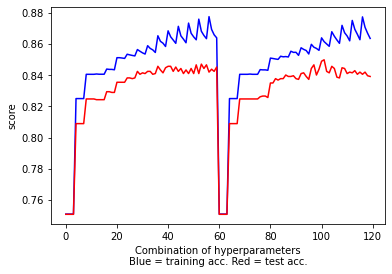

In [20]:
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

In [21]:
print(cv_1.best_params_)  # Here is the optimal hyperparameter

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}


In [22]:
cv_1.fit(X_train, y_train)  # Model accuracy with optimal hyperparameter

print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.8619198214119617
Test accuracy: 0.8544921875


In [23]:
# Retrain with optimal hyperparameter

model_small = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42, min_samples_leaf=10)
model_small.fit(X_train, y_train)

print("Train accuracy:", model_small.score(X_train, y_train))
print("Test accuracy:", model_small.score(X_test, y_test))

y_pred = model_small.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.8619198214119617
Test accuracy: 0.8544921875
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6921
           1       0.79      0.57      0.66      2295

    accuracy                           0.85      9216
   macro avg       0.83      0.76      0.78      9216
weighted avg       0.85      0.85      0.85      9216



In [24]:
treeObj = model_small.tree_  # # How many nodes we have in this tree 
print(treeObj.node_count)

427


In [25]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# Visualize the decision tree 
dotfile = StringIO()
export_graphviz(model_small, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("DT_viz.png") # saved in the following file - will return True if successful

In [27]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on salary (0 = <=50k, 1 = >50k). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 20
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on salary (0 = <=50k, 1 = >50k). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.9993311036789297 	 0.0006688963210702341 	 0
0.3116883116883117 	 0.6883116883116883 	 1
0.9955357142857143 	 0.004464285714285714 	 0
0.9993311036789297 	 0.0006688963210702341 	 0
0.9993311036789297 	 0.0006688963210702341 	 0
0.9955357142857143 	 0.004464285714285714 	 0
0.5340223944875108 	 0.46597760551248923 	 0
0.9813664596273292 	 0.018633540372670808 	 0
0.9993311036789297 	 0.0006688963210702341 	 0
0.9827850038255547 	 0.017214996174445295 	 0
0.9827850038255547 	 0.017214996174445295 	 0
0.9993311036789297 	 0.0006688963210702341 	 0
0.5730337078651685 	 0.42696629213483145 	 0
0.9993311036789297 	 0.0006688963210702341 	 0
0.56 	 0.44 	 0
1.0 	 0.0 	 0
0.7949790794979079 	 0.20502092050209206 	 0
0.0 	 1.0 	 1
1.0 	 0.0 	 0
0.9827850038255547 	 0.0172149961744452

In [28]:
from sklearn.metrics import roc_auc_score  # Count our ROC accuracy

y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.77099204561659
ROC index on test for DT_optimal: 0.8983908026438432


In [29]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

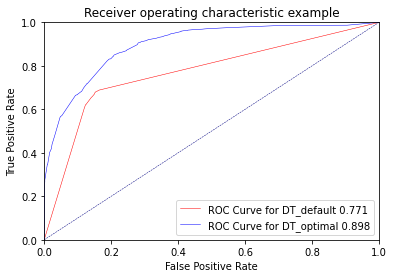

In [30]:
import matplotlib.pyplot as plt  # Visualize the ROC/AUC curve

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()